# ÖDEV4
# Öğrenci No: 171024011
# Öğrenci Adı ve Soyadı: Yağmur Derya


In [1]:
# gerekli tanımlamalar yapıldı
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl

%matplotlib notebook

import zplane # sonradan oluşturulan fonksiyon

exp = np.exp
pi = np.pi

## SORU-1

$y[n]=\frac{1}{2}y[n-1]-4y[n-2]+2y[n-3]+x[n]+\frac{2}{3}x[n-1]+\frac{1}{9}x[n-2]
$

### a)

$y[n]-\frac{1}{2}y[n-1]+4y[n-2]-2y[n-3]=x[n]+\frac{2}{3}x[n-1]+\frac{1}{9}x[n-2]
\\
$lineerlik ve zamanda öteleme özelliklerini kullanırak Z-dönüşümü yaparsak:$
\\Y(z)-\frac{1}{2}z^{-1}Y(z)+4z^{-2}Y(z)-2z^{-3}Y(z)=X(z)+\frac{2}{3}z^{-1}X(z)+\frac{1}{9}z^{-2}X(z)
\\Y(z)(1-\frac{1}{2}z^{-1}+4z^{-2}-2z^{-3})=X(z)(1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2})
$

$H(z) = \frac{Y(z)}{X(z)}=\frac{1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2}}{1-\frac{1}{2}z^{-1}+4z^{-2}-2z^{-3}}$

### b)

$1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2}=0$ denkleminin kökleri sıfırlar, $1-\frac{1}{2}z^{-1}+4z^{-2}-2z^{-3}=0$ denkleminin kökleriyse kutuplardır

$1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2}=(1+\frac{1}{3}z^{-1})^2=0 => z^{-1}=-3, z= -\frac{1}{3}
$

$2-z^{-1}+8z^{-2}-4z^{-3}=-(z^{-1}-2)(4z^{-2}+1)=0
\\z^{-1}-2=0=> z^{-1}=2, z=\frac{1}{2}
\\4z^{-2}+1=0=> z^{-2}=-\frac{1}{4}, z=\pm j2$

<IPython.core.display.Javascript object>


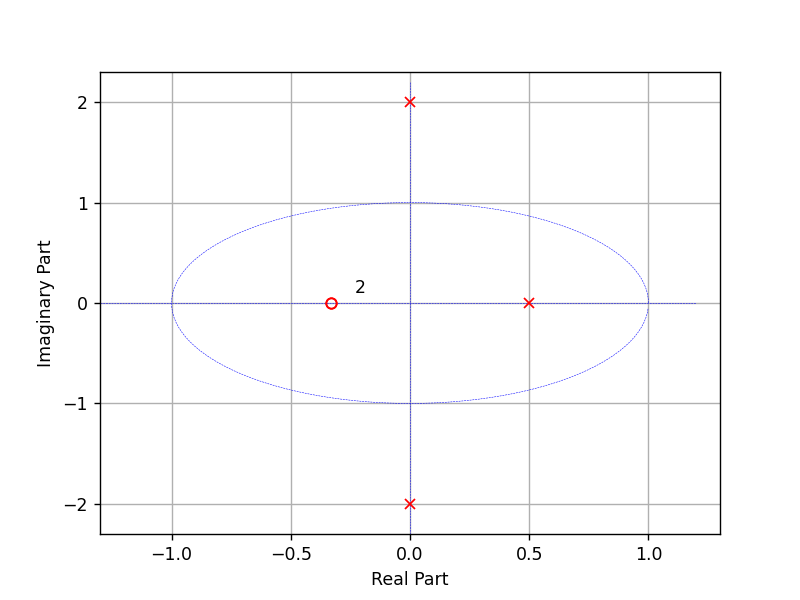

In [2]:
z = np.array([-1/3, -1/3])   # sıfırlar
p = np.array([1/2, -2j, 2j]) # kutuplar
k = 1                        # H(0) = k

b, a = sgnl.zpk2tf(z, p, k)  # b payın, a paydanın katsayıları (z'nin pozitif kuvvetleri için)

zplane.zplane(b,a)           # diyagramı çizdirdik

### c)

c.1. eğer $h[n]=0, n<0$ ise yani sistem nedenselse, sağ yanlı olmalı. ROC: $|z|>|j2|=2$.

c.2. eğer sistemin Fourier dönüşümü varsa, ROC birim çemberi içermeli. $|z|>\frac{1}{2}$ ve $|z|<2$ birim çemberi içerir. Öyleyse ROC çift yanlı olup $\frac{1}{2}<|z|<2$'dir

### d)

In [3]:
r, pole, k = sgnl.residuez(b,a)     # negatif kuvvetli z için katsayılar, kutuplar ve varsa polinom

print("kesir katsayıları, z:", r)
print("kutuplar, p:", pole)
print("polinom, k:", k)

kesir katsayıları, z: [0.16339869+0.j         0.41830065-0.27124183j 0.41830065+0.27124183j]
kutuplar, p: [ 5.00000000e-01+0.j -5.55111512e-17+2.j -5.55111512e-17-2.j]
polinom, k: []


$H(z)=\frac{0.163}{1-0.5z^{-1}}+\frac{0.418-0.271j}{1-2jz^{-1}}+\frac{0.418+0.271j}{1-(-2j)z^{-1}}, |z|>2
\\h[n]=0.163(0.5)^nu[n]+(0.418-0.271j)(2j)^nu[n]+(0.418+0.271j)(-2j)^nu[n]
$

<IPython.core.display.Javascript object>


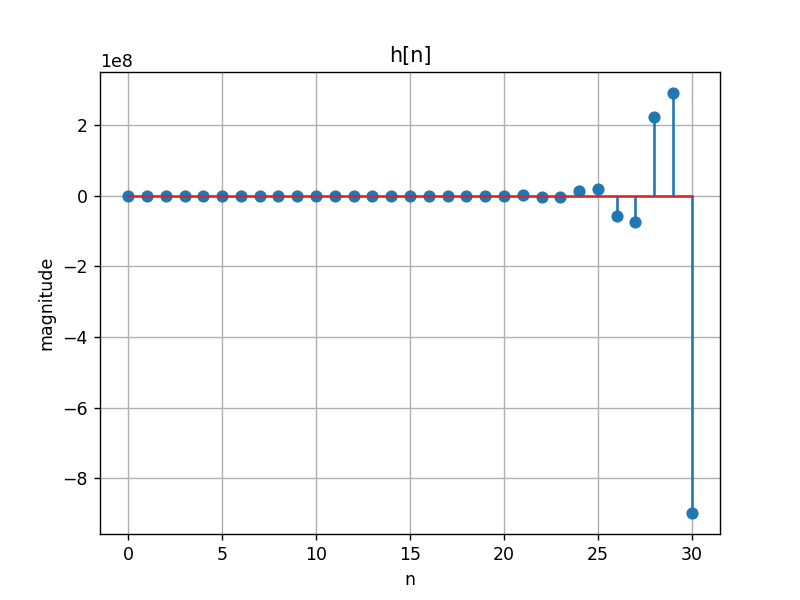

In [4]:
num, denum = sgnl.zpk2tf(z, p, 1)             # pay ve paydadaki z'li ifadelerin katsayıları alındı

n = np.arange(0, 31)                          # n = [0, 30] aralığı ayarlandı
x = np.array([1 if i == 0 else 0 for i in n]) # dirac[n] tanımlandı
h = sgnl.lfilter(num, denum, x)               # örnek 10'daki gibi lfilter ile girişe dirac vererek dürtü cevabı elde edildi

plt.figure()                             # yeni figür
plt.stem(n, h)
plt.title('h[n]')
plt.xlabel('n'), plt.ylabel('magnitude')
plt.grid()

plt.show()

### e)

Sistemin nedensel olması demek sağ yanlı olması demektir. Kararlı olması demek, birim çemberi içeriyor demektir. Sistem bu şekildeyken iki koşul aynı anda sağlanamamaktadır. Kararlı olduğunda çift yanlı olduğu için nedensel, nedensel olduğunda ise birim çemberi içermediği için kararlı değildir. Sistem; $(4z^{-2}+1)$ ifadesi ile çarpılırsa, $\pm 2j$ kökleri gider, sadece $z=0.5$ kökü kalır. Bu durumda ROC: $|z|>0.5$ için sistem hem nedensel hem de kararlı olur.

### f)

$H(z) =(4z^{-2}+1) \frac{1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2}}{1-\frac{1}{2}z^{-1}+4z^{-2}-2z^{-3}}=\frac{2+\frac{4}{3}z^{-1}+\frac{2}{9}z^{-2}}{-(z^{-1}-2)}$

<IPython.core.display.Javascript object>


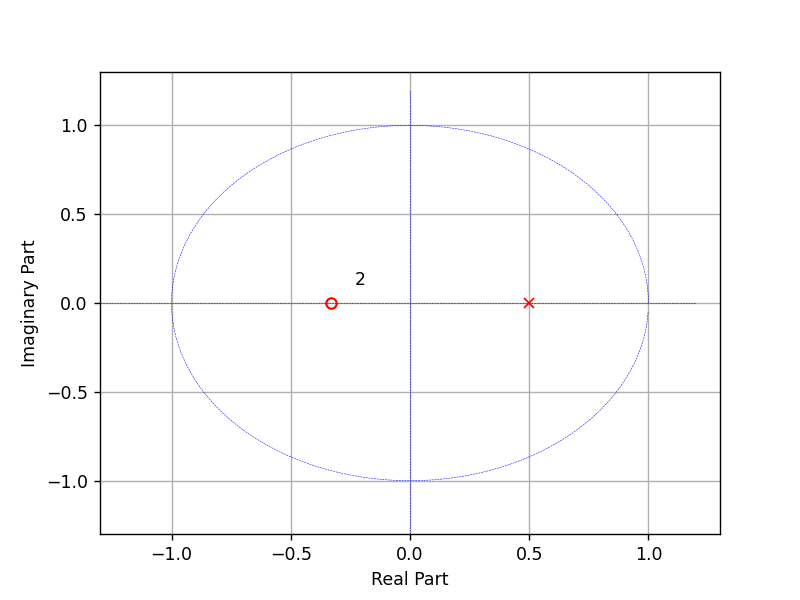

<IPython.core.display.Javascript object>


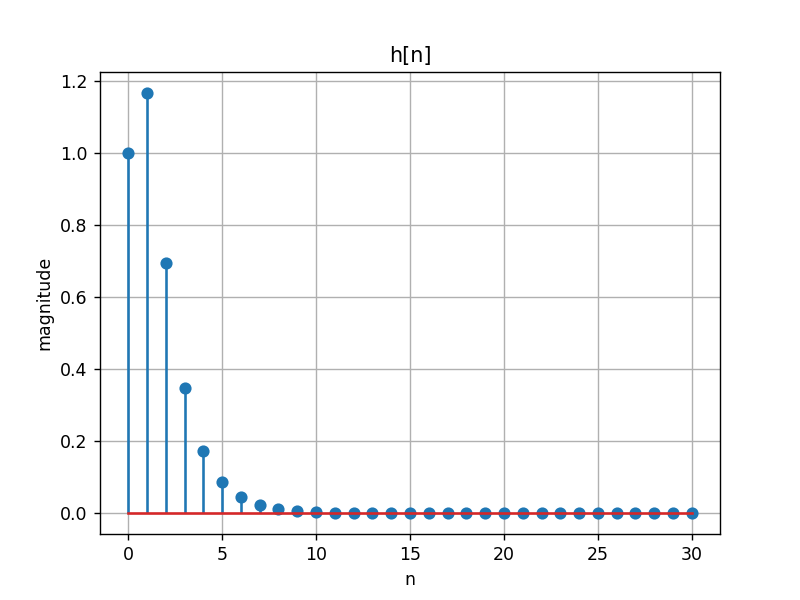

In [5]:
z_f = np.array([-1/3, -1/3])  # sıfırlar
p_f = np.array([1/2])         # kutuplar
k_f = 1

b_f, a_f = sgnl.zpk2tf(z_f, p_f, k_f) # sistemin sıfır ve kutuplarını elde etmek için
zplane.zplane(b_f,a_f)                # diyagram çizdirildi

n_f = np.arange(0, 31)                           # 31 örnekten oluşan [0, 31] aralığı ayarlandı
x_f = np.array([1 if i == 0 else 0 for i in n])  # dirac işareti oluşturuldu
y_f = sgnl.lfilter(b_f, a_f, x)                  # dürtü cevabı elde edildi

plt.figure()
plt.stem(n_f, y_f)
plt.title('h[n]')
plt.xlabel('n'), plt.ylabel('magnitude')
plt.grid()

plt.show()

Sistem fonksiyonunun sadece reel kutbu vardır ve 0.5'e eşittir. Sistemin kararlı ve nedensel olduğunu yani $|z|>0.5$ olduğunu bildiğimiz için, h[n]'nin sağ yanlı ve tüm genlik değerlerinin toplamının sınırlı olması beklenir. Çizdirdiğim h[n] grafiğinden sağ yanlı olduğu ve büyük en değerleri için genliğin sıfıra yakınsadığı, dolayısıyla toplamın sınırlı bir sayıya eşit olduğu görülmektedir. 

Başlangıçta bulunan 3 kutuplu H(z), kutupların konumundan dolayı, birim çemberi içerdiği durumda sağ yanlı (nedensel) olamıyordu. Nedensel olduğunu düşünüp (h[n]=0, n<0=) buna göre dürtü cevabı bulunduğunda, n değeri büyüdükçe genliğinin de büyüdüğü, sonsuza yakınsadığı (kararsız olduğu) görülmektedir. 

## SORU-2

$H(z)=\frac{z^2}{(z+1)(z-1)^2} = \frac{A}{z+1}+\frac{B}{z-1}+\frac{C}{(z-1)^2}
\\A=\frac{z^2}{(z-1)^2}|_{z=-1} = \frac{1}{4}
\\\frac{z^2}{z+1}|_{z=1} = [\frac{(z-1)^2A}{z+1}+(z-1)B+C]_{z=1} = \frac{1}{2}=C
\\\frac{d}{dz}\frac{z^2}{z+1}|_{z=1} = \frac{d}{dz}[\frac{(z-1)^2A}{z+1}+(z-1)B+C]_{z=1} = \frac{2z(z+1)-z^2}{(z+1)^2}|_{z=1} = B = \frac{3}{4}
$

$H(z)=\frac{1}{4}\frac{1}{z+1}+\frac{3}{4}\frac{1}{z-1}+\frac{1}{2}\frac{1}{(z-1)^2}=\frac{1}{4}\frac{1}{1+\frac{1}{z^{-1}}}+\frac{3}{4}\frac{1}{\frac{1}{z^{-1}}-1}+\frac{1}{2}\frac{1}{(\frac{1}{z^{-1}}-1)^2}
\\=\frac{1}{4}\frac{z^{-1}}{1+z^{-1}}+\frac{3}{4}\frac{z^{-1}}{1-z^{-1}}+\frac{1}{2}\frac{z^{-1}z^{-1}}{(1-z^{-1})^2} ,|z|>1$

$x[n-n_d] \leftrightarrow z^{-n_d}X(z)
\\ \frac{1}{1-\alpha z^{-1}} \leftrightarrow \alpha^nu[n]
\\ \frac{\alpha z^{-1}}{(1-\alpha z^{-1})^2} \leftrightarrow n\alpha^nu[n]
$

$h[n]=\frac{1}{4}(-1)^{n-1}u[n-1]+\frac{3}{4}u[n-1]+\frac{1}{2}(n-1)u[n-1]
$

In [6]:
# örnek 7'deki gibi

z_2 = np.array([0, 0])     # sıfırlar: z = 0(çift kök)
p_2 = np.array([-1, 1, 1]) # kutuplar: z = -1, 1(çift kök)

b_2, a_2 = sgnl.zpk2tf(z_2, p_2, 1)         # sıfırların ve kutupların katsayılarını aldık
r_2, pole_2, k_2 = sgnl.residue(b_2, a_2)   # pozitif kuvvetli polinomlarının kesir katsayıları, kutupları ve varsa polinomu

print("kesir katsayıları, z:", r_2)
print("kutuplar, p:", pole_2)
print("polinom, k:", k_2)

kesir katsayıları, z: [0.25 0.75 0.5 ]
kutuplar, p: [-1.  1.  1.]
polinom, k: []


$H(z)=0+\frac{0.25}{1-(-z)}+\frac{0.75}{1-z}+\frac{0.5}{(1-z)^2}=\frac{1}{4}\frac{1}{1+z}+\frac{3}{4}\frac{1}{1-z}+\frac{1}{2}\frac{1}{(1-z)^2}$

Gözlem yöntemiyle, $h[n]=\frac{1}{4}(-1)^{n-1}u[n-1]+\frac{3}{4}u[n-1]+\frac{1}{2}(n-1)u[n-1]$ olarak bulunmuştu.

<IPython.core.display.Javascript object>


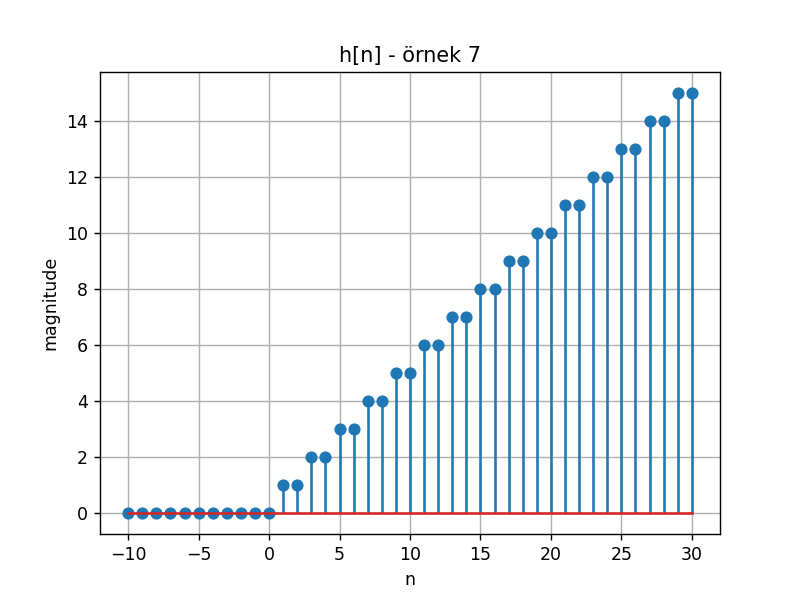

In [7]:
n = np.arange(-10, 31) # aralık [-10, 30]
h_2_1 = ([(1/4)*((-1)**(i-1))+(3/4)+(1/2)*(i-1) if i >= 1 else 0 for i in n]) #h[n] işareti tanımlandı

plt.figure()

plt.stem(n, h_2_1)
plt.title('h[n] - örnek 7')
plt.xlabel('n')
plt.ylabel('magnitude')
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


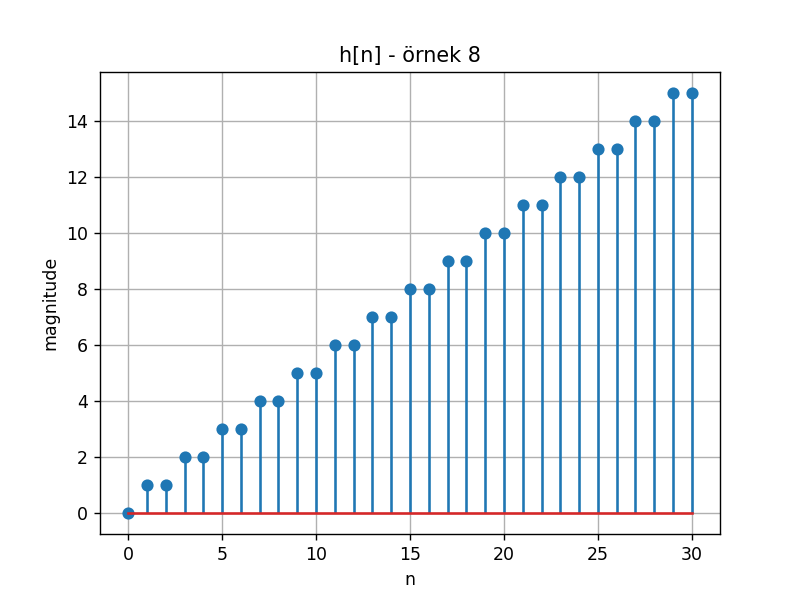

In [8]:
# örnek 8'deki gibi

num_2, denum_2 = sgnl.zpk2tf(z_2, p_2, 1)  # negatif kuvvetli z'lerin katsayıları kutup ve sıfırlar ile elde edildi
n_2_2, h_2_2 = sgnl.dimpulse((num_2, denum_2, 1), x0=0, n= 31) # [0, 30] aralığı ayarlandı
h_2_2 = np.squeeze(h_2_2)

plt.figure()
plt.stem(n_2_2, h_2_2)
plt.title('h[n] - örnek 8')
plt.xlabel('n')
plt.ylabel('magnitude')
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


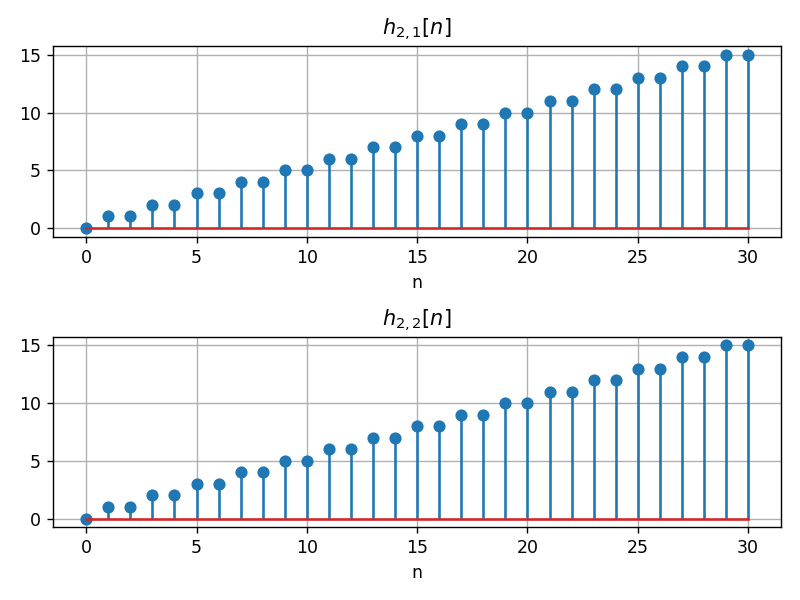

In [22]:
n = np.arange(0,31) # [0, 50] arası 51 elemanlı indeks vektörü
h_2_1 = ([(1/4)*((-1)**(i-1))+(3/4)+(1/2)*(i-1) if i >= 1 else 0 for i in n]) # örnek 7'deki işaret yeni n için tanımlandı

plt.figure()

plt.subplot(2, 1, 1), plt.stem(n, h_2_1), plt.title('$h_{2,1}[n]$'), plt.xlabel('n'), plt.grid() # örnek 7
plt.subplot(2, 1, 2), plt.stem(n, h_2_2), plt.title('$h_{2,2}[n]$'), plt.xlabel('n'), plt.grid() # örnek 8

plt.tight_layout(); # başlıkların birbiriyle çakışmaması için
plt.show()

Elde edilen sonuçlar birbirleriyle ve el ile bulduğum sonuçla örtüşmektedir. El ile bulduğum sonuç zaten örnek 7'deki gibi basit kesirlere ayırdıktan sonra gözlem yöntemi ile bulduğum $h_{2,1}[n]$'e eşit olduğu için, ayrıca çizdirmedim.

## SORU-3

$H(z)=\frac{1+3z^{-1}+\frac{11}{6}z^{-2}+\frac{1}{3}z^{-3}}{1+\frac{5}{6}z^{-1}+\frac{1}{6}z^{-2}}$

Önce polinom bölmesi yaparsak;$
\\ H(z)=\frac{2z^{-3}+11z^{-2}+18z^{-1}+6}{z^{-2}+5z^{-1}+6}=1+2z^{-1}+\frac{z^{-1}}{z^{-2}+5z^{-1}+6}
$ en sağdaki ifadeyi kısmi kesirlere ayırırsak;$
\\\frac{z^{-1}}{(3+z^{-1})(2+z^{-1})} = (\frac{A}{3+z^{-1}}+\frac{B}{2+z^{-1}})
\\A=\frac{z^{-1}}{2+z^{-1}}|_{z^{-1}=-3} = \frac{-3}{-1} = 3
\\B=\frac{z^{-1}}{3+z^{-1}}|_{z^{-1}=-2} = \frac{}{} = -2
\\ H(z) = 1+2z^{-1}+\frac{3}{3+z^{-1}}+\frac{-2}{2+z^{-1}} = 1+2z^{-1}+\frac{1}{1+\frac{1}{3}z^{-1}}+\frac{-1}{\frac{1}{2}z^{-1}}
$

Gözlem yöntemi ile $h[n]=\delta[n]+2\delta[n-1]+(-\frac{1}{3})^nu[n]-(-\frac{1}{2})^nu[n]$ bulunur.

In [10]:
# örnek 7'deki gibi

b_3 = np.array([1, 3, 11/6, 1/3]) # payın katsayıları
a_3 = np.array([1, 5/6, 1/6])     # paydanın katsayıları
r_3, pole_3, k_3 = sgnl.residuez(b_3, a_3) # negatif kuvvetli polinomlarının kesir katsayıları, kutupları ve varsa polinomu

print("kesir katsayıları, r:", r_3)
print("kutuplar, p:", pole_3)
print("polinom, k:", k_3)

kesir katsayıları, r: [ 1. -1.]
kutuplar, p: [-0.33333333 -0.5       ]
polinom, k: [1. 2.]


Buradan $H(z)=1+2z^{-1}+\frac{1}{1+0.33z^{-1}}-\frac{1}{1+0.5z^{-1}}$ olarak bulunur.

Gözlem yöntemi ile $h[n]=\delta[n]+2\delta[n-1]+(-\frac{1}{3})^nu[n]-(-\frac{1}{2})^nu[n]$ olarak el ile bulunmuştu. Aynı işaret elde edildi.

In [11]:
def d(n):          # dirac[n]
    if n == 0:
        return 1;
    else:
        return 0;
    
def u(n):          # u[n]
    if n >= 0:
        return 1;
    else:
        return 0;

<IPython.core.display.Javascript object>


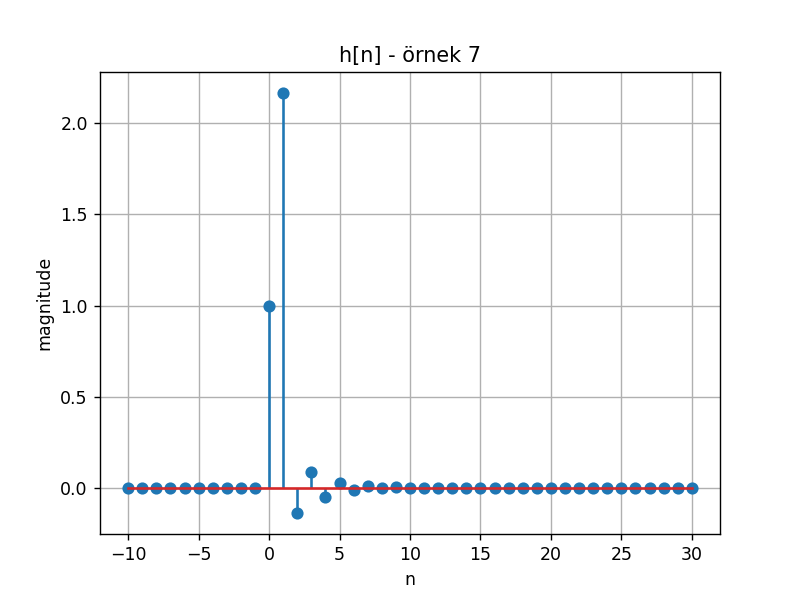

In [12]:
n_3 = np.arange(-10, 31)  # [-10, 30] aralığı ayarlandı
h_3_1 = [] # boş vektör oluşturuldu

for i in range(-10, 31):
    h = d(i) + 2*d(i-1) + ((-1/3)**i - (-1/2)**i)*u(i) # işaret tanımlandı
    h_3_1.append(h)                                    # vektör dolduruldu

plt.figure()

plt.stem(n_3, h_3_1)
plt.title('h[n] - örnek 7')
plt.xlabel('n')
plt.ylabel('magnitude')
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


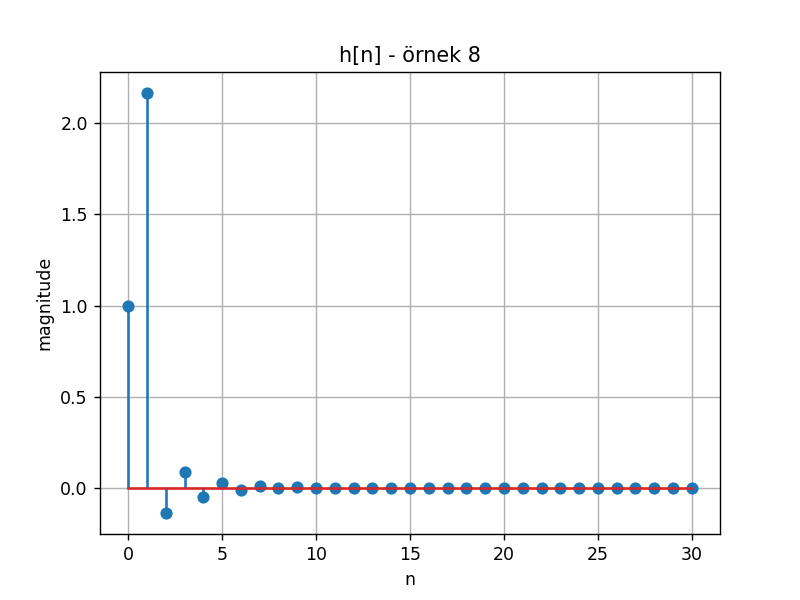

In [13]:
# örnek 8'deki gibi

num_3 = np.array([1, 3, 11/6, 1/3])  # payın katsayıları
denum_3 = np.array([1, 5/6, 1/6, 0]) # paydanın katsayıları

n_3, h_3_2 = sgnl.dimpulse((num_3, denum_3, 1), x0=0, n=31) # [0, 30] aralığı ayarlandı
h_3_2 = np.squeeze(h_3_2)

plt.figure()

plt.stem(n_3, h_3_2)
plt.title('h[n] - örnek 8')
plt.xlabel('n')
plt.ylabel('magnitude')
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


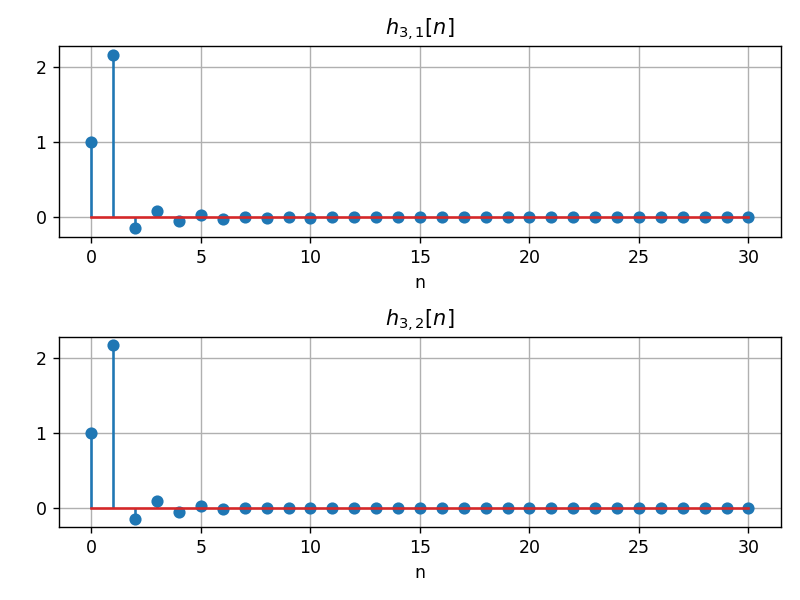

In [14]:
n_3 = np.arange(0,31) # [0, 30] arası 31 elemanlı indeks vektörü

# örnek 7de bulunan işaret yeni aralığa göre tekrar tanımlandı
h_3_1 = [] 
for i in range(0, 31):
    h = d(i) + 2*d(i-1) + ((-1/3)**i - (-1/2)**i)*u(i)
    h_3_1.append(h)

plt.figure()

plt.subplot(2, 1, 1), plt.stem(n_3, h_3_1), plt.title('$h_{3,1}[n]$'), plt.xlabel('n'), plt.grid()  # örnek 7
plt.subplot(2, 1, 2), plt.stem(n_3, h_3_2), plt.title('$h_{3,2}[n]$'), plt.xlabel('n'), plt.grid()  # örnek 8

plt.tight_layout();  
plt.show()

Elde edilen sonuçlar birbirleriyle ve el ile bulduğum sonuçla örtüşmektedir. El ile bulduğum sonuç zaten örnek 7'deki gibi basit kesirlere ayırdıktan sonra gözlem yöntemi ile bulduğum $h_{3,1}[n]$'e eşit olduğu için, ayrıca çizdirmedim.

## SORU-4

$H(z)=\frac{10(1-\frac{1}{\sqrt{2}}z^{-1})}{(1-e^{j\frac{\pi}{4}}z^{-1})(1-e^{-j\frac{\pi}{4}}z^{-1})(1-0.5z^{-1})}$

$=\frac{A}{1-e^{j\frac{\pi}{4}}z^{-1}}+\frac{B}{1-e^{-j\frac{\pi}{4}}z^{-1}}+\frac{C}{1-0.5z^{-1}}
\\ A = \frac{10(1-\frac{1}{\sqrt{2}}z^{-1})}{(1-e^{-j\frac{\pi}{4}}z^{-1})(1-0.5z^{-1})}|_{z^{-1}=e^{-j\frac{\pi}{4}}}
= \frac{10(1-\frac{1}{\sqrt{2}}e^{-j\frac{\pi}{4}})}{(1-e^{-j\frac{\pi}{2}})(1-0.5e^{-j\frac{\pi}{4}})}
\\ B = \frac{10(1-\frac{1}{\sqrt{2}}z^{-1})}{(1-e^{j\frac{\pi}{4}}z^{-1})(1-0.5z^{-1})}|_{z^{-1}=e^{j\frac{\pi}{4}}}
= \frac{10(1-\frac{1}{\sqrt{2}}e^{j\frac{\pi}{4}})}{(1-e^{j\frac{\pi}{2}})(1-0.5e^{j\frac{\pi}{4}})}
\\ C = \frac{10(1-\frac{1}{\sqrt{2}}z^{-1})}{(1-e^{j\frac{\pi}{4}}z^{-1})(1-e^{-j\frac{\pi}{4}}z^{-1})}|_{z^{-1}=2}
= \frac{10(1-\frac{1}{\sqrt{2}}2)}{(1-2e^{j\frac{\pi}{4}})(1-2e^{-j\frac{\pi}{4}})}
$

$H(z) = \frac{10(1-\frac{1}{\sqrt{2}}e^{-j\frac{\pi}{4}})}{(1-e^{-j\frac{\pi}{2}})(1-0.5e^{-j\frac{\pi}{4}})}\frac{1}{1-e^{j\frac{\pi}{4}}z^{-1}} 
+ \frac{10(1-\frac{1}{\sqrt{2}}e^{j\frac{\pi}{4}})}{(1-e^{j\frac{\pi}{2}})(1-0.5e^{j\frac{\pi}{4}})}\frac{1}{1-e^{-j\frac{\pi}{4}}z^{-1}}
+\frac{10(1-\frac{1}{\sqrt{2}}2)}{(1-2e^{j\frac{\pi}{4}})(1-2e^{-j\frac{\pi}{4}})}\frac{1}{1-0.5z^{-1}}
$

Gözlem yöntemi ile $h[n]=\frac{10(1-\frac{1}{\sqrt{2}}e^{-j\frac{\pi}{4}})}{(1-e^{-j\frac{\pi}{2}})(1-0.5e^{-j\frac{\pi}{4}})}(e^{j\frac{\pi}{4}})^nu[n]
+\frac{10(1-\frac{1}{\sqrt{2}}e^{j\frac{\pi}{4}})}{(1-e^{j\frac{\pi}{2}})(1-0.5e^{j\frac{\pi}{4}})}(e^{-j\frac{\pi}{4}})^nu[n]
+\frac{10(1-\frac{1}{\sqrt{2}}2)}{(1-2e^{j\frac{\pi}{4}})(1-2e^{-j\frac{\pi}{4}})}(0.5)^nu[n]$

$h[n]=(5.954-j3.256)(0.707+j0.707)^nu[n]
+(5.954+j3.256)(0.707-j0.707)^nu[n]
+(-1.907)(0.5)^nu[n]$

In [15]:
# elde bulduğumuz işaret çizdirilirse;
n_4 = np.arange(-10, 31) # [-10, 30] aralığı ayarlandı
h_4 = np.array([(-1.9074357)*((0.5)**i) 
                + (5.95371785-3.25619642j)*((0.70710678+0.70710678j)**i) 
                + (5.95371785+3.25619642j)*((0.70710678-0.70710678j)**i) if i >= 0 else 0 for i in n_4], dtype = complex)

In [16]:
# örnek 7'deki gibi
z_4 = np.array([1/np.sqrt(2)])                       # sıfırlar
p_4 = np.array([1/2, exp(1j*pi/4) , exp(-1j*pi/4)])  # kutuplar

b_4, a_4 = sgnl.zpk2tf(z_4, p_4, 10)         # sıfırların ve kutupların katsayılarını aldık
r_4, pole_4, k_4 = sgnl.residuez(b_4, a_4)   # polinomlarının kesir katsayıları, kutupları ve varsa polinomu

print("kesir katsayıları, r:", r_4)
print("kutuplar, p:", pole_4)
print("polinom, k:", k_4)

kesir katsayıları, r: [-1.9074357 +0.j          5.95371785-3.25619642j  5.95371785+3.25619642j]
kutuplar, p: [0.5       +0.j         0.70710678+0.70710678j 0.70710678-0.70710678j]
polinom, k: []


Buradan $H(z)=\frac{-1.9074357}{1-0.5z^{-1}}+\frac{5.95371785-3.25619642j}{1-(0.70710678+0.70710678j)z^{-1}}+\frac{5.95371785+3.25619642j}{1-(0.70710678-0.70710678j)z^{-1}}$ olarak bulunur.

Gözlem yöntemi ile $h[n]=(-1.9074357)(0.5)^nu[n]+(5.95371785-3.25619642j)(0.70710678+0.70710678j)^nu[n]+(5.95371785+3.25619642j)(0.70710678-0.70710678j)^nu[n]$ olarak bulundu.

Bulunan işaret el ile bulduğum işarete eşittir.

<IPython.core.display.Javascript object>


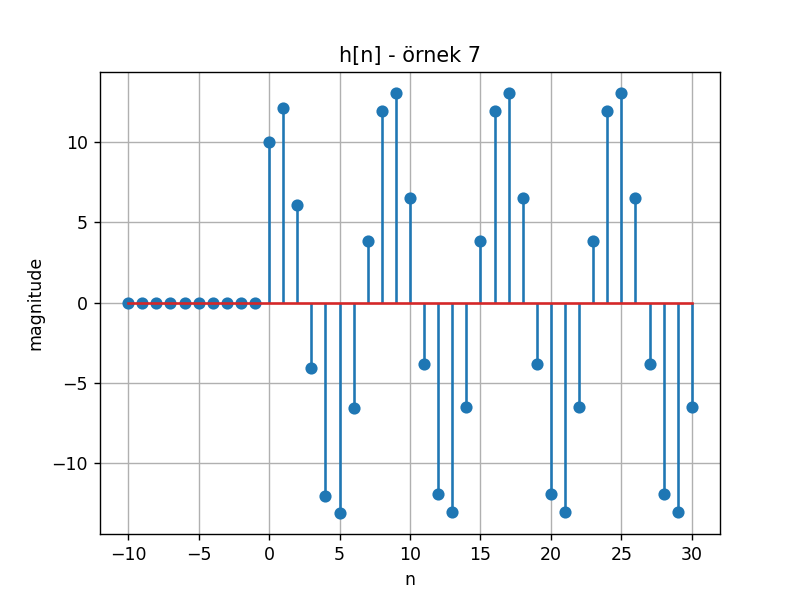

In [24]:
n_4 = np.arange(-10, 31) # [-10, 30] aralığı ayarlandı
# bulunan dürtü yanıtı tanımlandı
h_4_1 = np.array([(-1.9074357)*((0.5)**i) 
                  + (5.95371785-3.25619642j)*((0.70710678+0.70710678j)**i) 
                  + (5.95371785+3.25619642j)*((0.70710678-0.70710678j)**i) if i >= 0 else 0 for i in n_4], dtype = complex)

plt.figure()

plt.stem(n_4, h_4_1.real) # ComplexWarning verdiği için gerçek kısmını çizdirdim. Sanal kısmı 0'lardan oluştuğu için çizdirmedim
plt.title('h[n] - örnek 7')
plt.xlabel('n')
plt.ylabel('magnitude')
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


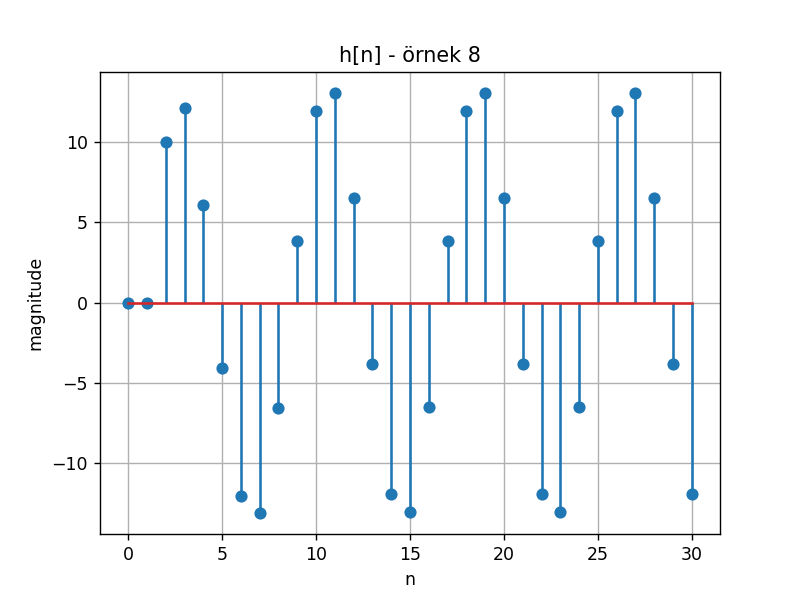

In [18]:
# örnek 8'deki gibi

num_4, denum_4 = sgnl.zpk2tf(z_4, p_4, 10)                  # bu sefer kazanç 10
n_4, h_4_2 = sgnl.dimpulse((num_4, denum_4, 1), x0=0, n=31) # aralık [0, 30]
h_4_2 = np.squeeze(h_4_2)

plt.figure()

plt.stem(n_4, h_4_2)
plt.title('h[n] - örnek 8')
plt.xlabel('n')
plt.ylabel('magnitude')
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


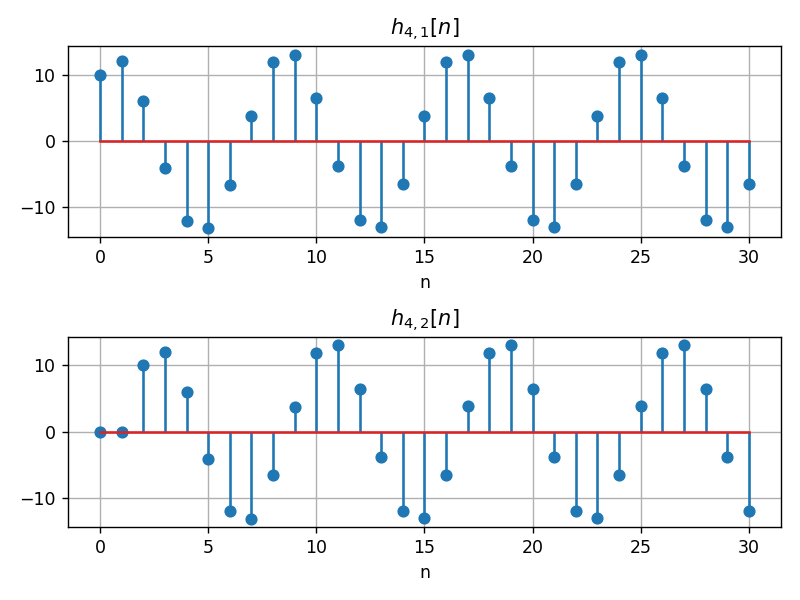

In [19]:
n_4 = np.arange(0,31) # [0, 30] arası 31 elemanlı indeks vektörü

# örnek 7de bulunan işaret yeni aralığa göre tekrar tanımlandı
h_4_1 = np.array([(-1.9074357)*((0.5)**i) 
                  + (5.95371785-3.25619642j)*((0.70710678+0.70710678j)**i) 
                  + (5.95371785+3.25619642j)*((0.70710678-0.70710678j)**i) if i >= 0 else 0 for i in n_4], dtype = complex)

plt.figure()

plt.subplot(2, 1, 1), plt.stem(n_4, h_4_1.real), plt.title('$h_{4,1}[n]$'), plt.xlabel('n'), plt.grid() # örnek 7
plt.subplot(2, 1, 2), plt.stem(n_4, h_4_2), plt.title('$h_{4,2}[n]$'), plt.xlabel('n'), plt.grid()      # örnek 8

plt.tight_layout();  
plt.show()

İki işaret aynı fakat $h_{4,2}[n] = h_{4,1}[n-2]$ yani örnek 8'deki gibi bulduğumuz işaret gecikmiş çıktı. El ile bulduğum işaret $h_{4,1}[n]$ işaretine eşit çıktığı için tekrar çizdirmedim.

## SORU-5

<IPython.core.display.Javascript object>


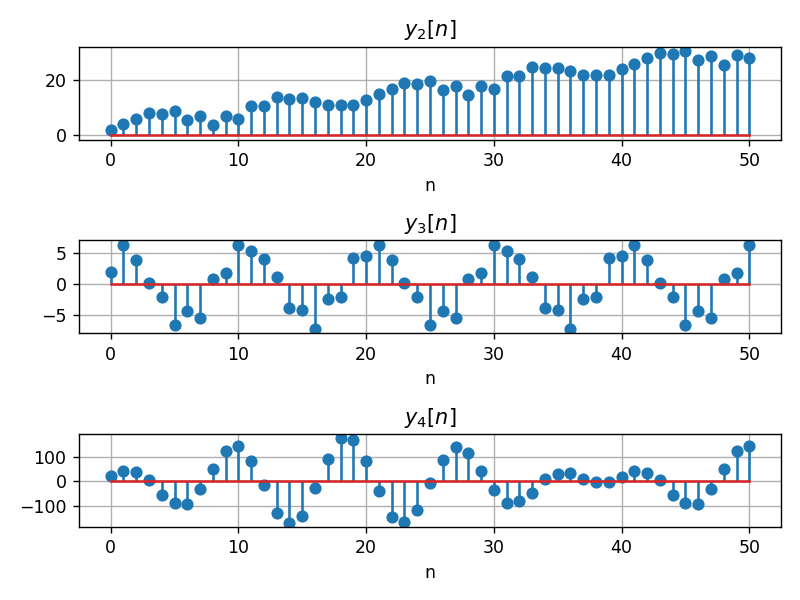

In [33]:
n = np.arange(0, 51)                              # n = [0, 50] aralığı ayarlandı
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n)  # örnek 10'daki giriş işareti

y_2 = sgnl.lfilter(num_2, denum_2, xn)            # sistem 2
y_3 = sgnl.lfilter(num_3, denum_3, xn)            # sistem 3
y_4 = sgnl.lfilter(num_4, denum_4, xn)            # sistem 4

plt.figure()  # yeni figür

plt.subplot(3, 1, 1), plt.stem(n, y_2), plt.title('$y_2[n]$'), plt.xlabel('n'), plt.grid() # sistem 2
plt.subplot(3, 1, 2), plt.stem(n, y_3), plt.title('$y_3[n]$'), plt.xlabel('n'), plt.grid() # sistem 3
plt.subplot(3, 1, 3), plt.stem(n, y_4), plt.title('$y_4[n]$'), plt.xlabel('n'), plt.grid() # sistem 4

plt.tight_layout();  
plt.show()